In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import operator
import itertools
import os

In [2]:
path='/home/pedrozamboni/Documentos/doutorado/dataset/corine/Production_Crops_Livestock_E_All_Data/Production_Crops_Livestock_E_All_Data.csv'

In [3]:
df = pd.read_csv(path,
                  encoding="ISO-8859-1")

In [4]:
corine_list=[]
for i in [2015,2016,2017,2018,2019]:
    path=os.path.join("/home/pedrozamboni/Documentos/doutorado/dataset/corine/corine_data/",str(i)+'.csv')
    cf=pd.read_csv(path)
    cf=cf.drop(['Class_200','Class_100','Class_20','Class_30','Class_50','Class_60','Class_70', 'Class_sum','Class_0','Class_90','Class_80','system:index','id'],axis=1)
    cf['ano']=i
    corine_list.append(cf)

In [5]:
corine_df =  pd.concat(corine_list,axis=0)
corine_df=corine_df.reset_index(drop=True)

In [6]:
temp=[]
for i in list(df['Area'].unique()):
    if i not in list(corine_df['name'].unique()):
        temp.append(i)

In [7]:
for i in range(len(df["Area"].unique())):
    if '(' in df["Area"].unique()[i]:
        print(df["Area"].unique()[i])

Bolivia (Plurinational State of)
Iran (Islamic Republic of)
Micronesia (Federated States of)
Sudan (former)
Venezuela (Bolivarian Republic of)
European Union (27)


In [8]:
sorted(corine_df['name'].unique())

['Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bangladesh',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominican Republic',
 'East Timor',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Falkland Islands',
 'Fiji',
 'Finland',
 'France',
 'French Guiana',
 'French Southern and Antarctic Lands',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Greenland',
 'Guatemala',
 'Guinea',
 'Guinea Bissau',
 'Guyana',
 'Haiti',
 'Honduras',
 'Hungary',
 'Iceland',
 'India',
 'Indonesi

Precisamos arrumar os nomes da Fao e verificar se tem todos na corine 
Vamos corrigir os paises que tem "(" no nome ;
Alem desses os seguintes paises serao corrigidos:  "Democratic People's Republic of Korea",'Ethiopia PDR', 
'Republic of Korea','Russian Federation','Syrian Arab Republic', 'United Kingdom of Great Britain and Northern Ireland',
 'Viet Nam',
Os outros paises nao serao considerados

In [9]:
###Criando dicionario para os outros paise
replacer2={"Bolivia (Plurinational State of)":'Bolivia',
        "Iran (Islamic Republic of)":'Iran',
        "Sudan (former)":'Sudan',
        "Venezuela (Bolivarian Republic of)":"Venezuela",
            "Democratic People's Republic of Korea": 'North Korea',
            'Ethiopia PDR':'Ethiopia', 
            'Republic of Korea': 'South Korea',
            'Russian Federation':'Russia',
           'Syrian Arab Republic':'Syria',
           'United Kingdom of Great Britain and Northern Ireland':'United Kingdom',
             'Viet Nam':'Vietnam'}

In [10]:
df=df.replace({"Area": replacer2})

In [11]:
temp2=[]
for i in list(df['Area'].unique()):
    if i not in list(corine_df['name'].unique()):
        temp2.append(i)

In [12]:
####Paises que tem nos dados da Fao mas nao tem na corine 
### Iremos ignorar esses paises
### Para china iremos usar o calor china dos dados da FAO e ignorar as outras chinas
temp2

['Antigua and Barbuda',
 'Bahamas',
 'Bahrain',
 'Barbados',
 'Belgium-Luxembourg',
 'Brunei Darussalam',
 'Cabo Verde',
 'China, Hong Kong SAR',
 'China, Macao SAR',
 'China, mainland',
 'China, Taiwan Province of',
 'Comoros',
 'Congo',
 'Cook Islands',
 "Côte d'Ivoire",
 'Czechia',
 'Czechoslovakia',
 'Dominica',
 'Eswatini',
 'Faroe Islands',
 'French Guyana',
 'French Polynesia',
 'Grenada',
 'Guadeloupe',
 'Guinea-Bissau',
 'Kiribati',
 "Lao People's Democratic Republic",
 'Maldives',
 'Marshall Islands',
 'Martinique',
 'Mauritius',
 'Micronesia (Federated States of)',
 'Nauru',
 'Niue',
 'North Macedonia',
 'Palestine',
 'Republic of Moldova',
 'Réunion',
 'Saint Kitts and Nevis',
 'Saint Lucia',
 'Saint Vincent and the Grenadines',
 'Samoa',
 'Sao Tome and Principe',
 'Serbia',
 'Serbia and Montenegro',
 'Seychelles',
 'Singapore',
 'Timor-Leste',
 'Tokelau',
 'Tonga',
 'Tuvalu',
 'USSR',
 'Yugoslav SFR',
 'World',
 'Africa',
 'Eastern Africa',
 'Middle Africa',
 'Northern Afr

In [13]:
def get_data(df,item,element):
    
    ano_int = lambda x: int(x.replace('Y',''))
   
    df= df[(df['Item']==item) & (df['Element']==element)]
    df=df.drop(['Item','Area Code','Item Code','Element Code','Element','Unit'],axis=1)
    df=df.reset_index(drop=True)
    df=df.T.reset_index()
    df.columns=df.iloc[0]
    df2=df.rename({'Area': 'data'}, axis=1) 

    df2=df2[1:]
    df2=df2.iloc[::2]
    df2['Ano']=df2['data'].map(ano_int)
    df2=df2.drop('data',axis=1).apply(pd.to_numeric)
    df2=df2.set_index('Ano')

    return df2
   
        

In [14]:
df['Area'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belgium-Luxembourg', 'Belize',
       'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'China, Hong Kong SAR', 'China, Macao SAR', 'China, mainland',
       'China, Taiwan Province of', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', "Côte d'Ivoire", 'Croatia', 'Cuba',
       'Cyprus', 'Czechia', 'Czechoslovakia', 'North Korea',
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
      

Como podemos ver, no Dataframe temos areas para alem dos paises, como continentes 
Vamos separa os paises do resto 

In [15]:
countris_list= df['Area'].unique()[0:209]
continent_list=df['Area'].unique()[209:]

Craindo dicionario com os valores de produção por alimento e pais 

In [16]:
prod_dict={}

item_list=['Wheat','Maize','Rice, paddy','Soybeans']
for i in item_list:
    paises_alimento = np.array(get_data(df,i,'Production').columns.to_list())[0:np.where(np.array(get_data(df,i,'Production').columns.to_list())=='World')[0][0]]
    temp_dict={}
    for c in paises_alimento:
        temp_dict[c]=get_data(df,i,'Production')[c][-6:]
    
    prod_dict[i]=temp_dict

###Vamos checar se os valores estao corretos 

In [17]:
prod_dict['Wheat']['Brazil']

Ano
2015    5508451.0
2016    6834421.0
2017    4342812.0
2018    5469236.0
2019    5590815.0
2020    6347987.0
Name: Brazil, dtype: float64

In [18]:
df.loc[df['Area']=='Brazil'].loc[df.loc[df['Area']=='Brazil']['Item']=='Wheat']

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y1961,Y1961F,Y1962,...,Y2016,Y2016F,Y2017,Y2017F,Y2018,Y2018F,Y2019,Y2019F,Y2020,Y2020F
6833,21,Brazil,15,Wheat,5312,Area harvested,ha,1022234.0,NaN,743459.0,...,2166170.0,NaN,1905617.0,NaN,2080204.0,NaN,2103578.0,NaN,2434703.0,NaN
6834,21,Brazil,15,Wheat,5419,Yield,hg/ha,5330.0,Fc,9491.0,...,31551.0,Fc,22790.0,Fc,26292.0,Fc,26578.0,Fc,26073.0,Fc
6835,21,Brazil,15,Wheat,5510,Production,tonnes,544858.0,NaN,705619.0,...,6834421.0,NaN,4342812.0,NaN,5469236.0,NaN,5590815.0,NaN,6347987.0,NaN


In [19]:
prod_dict['Soybeans']['China, mainland']

Ano
2015    11785000.0
2016    12788894.0
2017    15282500.0
2018    15967100.0
2019    18100000.0
2020    19600000.0
Name: China, mainland, dtype: float64

In [20]:
df.loc[df['Area']=='China, mainland'].loc[df.loc[df['Area']=='China, mainland']['Item']=='Soybeans']

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y1961,Y1961F,Y1962,...,Y2016,Y2016F,Y2017,Y2017F,Y2018,Y2018F,Y2019,Y2019F,Y2020,Y2020F
11128,41,"China, mainland",236,Soybeans,5312,Area harvested,ha,9947000.0,NaN,9494500.0,...,7092736.0,F,8244810.0,NaN,8412770.0,NaN,9300000.0,NaN,9866000.0,NaN
11129,41,"China, mainland",236,Soybeans,5419,Yield,hg/ha,6243.0,Fc,6857.0,...,18031.0,Fc,18536.0,Fc,18980.0,Fc,19462.0,Fc,19866.0,Fc
11130,41,"China, mainland",236,Soybeans,5510,Production,tonnes,6210000.0,NaN,6510000.0,...,12788894.0,F,15282500.0,NaN,15967100.0,NaN,18100000.0,NaN,19600000.0,NaN


Vamos criar um dicionario com o somatorio dos 4 alimentos para cada pais

In [21]:
item_list=['Wheat','Maize','Rice, paddy','Soybeans']
world_prod={}
for w in sorted(countris_list) :
    temp_list=[]
    for c in [2015,2016,2017,2018,2019]:
        soma=0
        for i in item_list:
            try:
                x=prod_dict[i][w][c]
                soma=soma+x
            except:
                pass
        temp_list.append(soma)
    
    world_prod[w]=temp_list

Vamos fazer a soma das classes de foresta no dataframe corine

In [22]:
corine_df['forest']=corine_df[corine_df.columns.tolist()[1:13]].sum(axis=1)

In [23]:
norm=world_prod['China'][4]


Vamos ver o valor de P para 2015 para os paises

In [24]:
p_dict={}
for i in list(countris_list):
    temp=[]
    for j in list(range(5)):
        p=world_prod[i][j]/norm
        temp.append(p)
    p_dict[i]=temp

In [25]:
a_dict={}
for i in list(countris_list):
    if i in corine_df['name'].unique():
        temp=[]
        for j in list(range(5)):
            a=float(corine_df.loc[corine_df['name']==i].iloc[j]['Class_40'])
            temp.append(a)
        a_dict[i]=temp

In [26]:
v_dict={}
for i in list(countris_list):
    if i in corine_df['name'].unique():
        temp=[]
        for j in list(range(5)):
            v=float(corine_df.loc[corine_df['name']==i].iloc[j]['forest'])
            temp.append(v)
        v_dict[i]=temp

In [27]:
for i in ['Brazil','China','India','Indonesia','United States of America']:
    print(i,v_dict[i])

Brazil [0.5851300875176487, 0.5844974150884092, 0.5840028093761946, 0.5836722731716826, 0.5842228092809392]
China [0.256408196554299, 0.2562719965599864, 0.2561369703867806, 0.2560537437155912, 0.25600200130395423]
India [0.23252888948639797, 0.23248503372699353, 0.23245087181950574, 0.232387776426406, 0.2322901350759497]
Indonesia [0.84289044534298, 0.8423757000280667, 0.8416064414010203, 0.8412396597566449, 0.841660312653246]
United States of America [0.37492974176842475, 0.374179751609139, 0.37379617915793606, 0.37343240691179636, 0.37359323726851845]


In [28]:
for i in ['Brazil','China','India','Indonesia','United States of America']:
    print(i,p_dict[i])

Brazil [0.32137108669336095, 0.2852886568047836, 0.36766834738952975, 0.3486100185944248, 0.37079677659888705]
China [0.9987923110013611, 0.9975280593270505, 0.9986400873954951, 0.9916303696525245, 1.0]
India [0.43939067100905127, 0.47278282371375796, 0.4904408453183638, 0.5035856784888358, 0.5163274631363549]
Indonesia [0.13076542300353497, 0.12573784895953297, 0.1357458451935378, 0.14486871623348951, 0.12525868222409717]
United States of America [0.8284412977684927, 0.9649453013816842, 0.8759052167294765, 0.8752802375404839, 0.8069723821146765]


In [29]:
a_df=pd.DataFrame(a_dict).fillna(0)
v_df=pd.DataFrame(v_dict).fillna(0)
p_df=pd.DataFrame(p_dict)[v_df.columns.tolist()].fillna(0)

In [30]:
favi=(p_df/a_df)*v_df

In [31]:
sorted(favi.max(),reverse=True)

[inf,
 inf,
 21.454897612634003,
 14.684666276818206,
 3.319010754238816,
 3.0173978151373206,
 2.390732894874876,
 2.3523847982621873,
 1.3742926752234803,
 1.3464201662791373,
 0.87572605321019,
 0.6308356821308884,
 0.3445366602860519,
 0.31410370063672666,
 0.2718194729126089,
 0.23231132736572138,
 0.2273194035506777,
 0.22315915536931397,
 0.22082989066300587,
 0.2190865373069565,
 0.21224080321793176,
 0.1908660760628682,
 0.18414503599271467,
 0.1639412663703834,
 0.1447473731477511,
 0.13390743497863652,
 0.12658278615355548,
 0.10974474758572057,
 0.08707116005726354,
 0.07577385950891524,
 0.06862270566610593,
 0.0680507099363286,
 0.06009402641308424,
 0.05836594852571661,
 0.05717906693717316,
 0.0530282251034339,
 0.050708423910725456,
 0.049017101561016914,
 0.0438259284659014,
 0.04370426213033325,
 0.04295422120979755,
 0.04279893628391413,
 0.03965040900848937,
 0.038531715586944154,
 0.03832732253785035,
 0.03568486395164587,
 0.035428915500010594,
 0.033270022097519

Corrigir valores que deram inf

In [32]:
favi.head()

,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,Bangladesh,...,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
0,0.002027,0.0,0.001632,0.046467,0.155700,0.0,0.196674,0.012939,0.001069,0.035786,...,0.028777,2.022880,0.007033,0.000000,inf,0.099513,0.227319,0.000037,0.037340,0.001904
1,0.001952,0.0,0.001495,0.054601,0.156067,0.0,0.179114,0.015905,0.001171,0.035099,...,0.030734,2.352385,0.005918,0.000211,inf,0.090322,0.220890,0.000029,0.040272,0.001574
2,0.001778,0.0,0.001473,0.058112,0.173855,0.0,0.271819,0.013701,0.001165,0.037850,...,0.033352,2.132098,0.006432,0.000183,inf,0.083087,0.220011,0.000029,0.050708,0.004206
3,0.001467,0.0,0.002351,0.067297,0.140631,0.0,0.179512,0.013617,0.001295,0.038105,...,0.035429,2.124290,0.003559,0.000159,inf,0.109745,0.226015,0.000027,0.034565,0.004381
4,0.001933,0.0,0.002279,0.068623,0.184145,0.0,0.147141,0.015204,0.001384,0.038327,...,0.033414,1.958575,0.006221,0.000180,inf,0.093019,0.223727,0.000031,0.029872,0.001605


In [33]:
sorted(favi.max(),reverse=True)

[inf,
 inf,
 21.454897612634003,
 14.684666276818206,
 3.319010754238816,
 3.0173978151373206,
 2.390732894874876,
 2.3523847982621873,
 1.3742926752234803,
 1.3464201662791373,
 0.87572605321019,
 0.6308356821308884,
 0.3445366602860519,
 0.31410370063672666,
 0.2718194729126089,
 0.23231132736572138,
 0.2273194035506777,
 0.22315915536931397,
 0.22082989066300587,
 0.2190865373069565,
 0.21224080321793176,
 0.1908660760628682,
 0.18414503599271467,
 0.1639412663703834,
 0.1447473731477511,
 0.13390743497863652,
 0.12658278615355548,
 0.10974474758572057,
 0.08707116005726354,
 0.07577385950891524,
 0.06862270566610593,
 0.0680507099363286,
 0.06009402641308424,
 0.05836594852571661,
 0.05717906693717316,
 0.0530282251034339,
 0.050708423910725456,
 0.049017101561016914,
 0.0438259284659014,
 0.04370426213033325,
 0.04295422120979755,
 0.04279893628391413,
 0.03965040900848937,
 0.038531715586944154,
 0.03832732253785035,
 0.03568486395164587,
 0.035428915500010594,
 0.033270022097519

In [34]:
np.where(np.array(favi)==21.454897612634003)

(array([2]), array([131]))

In [35]:
np.where(np.array(favi)== 14.684666276818206)

(array([0]), array([79]))

In [36]:
np.where(np.array(favi)==  3.319010754238816)

(array([2]), array([49]))

In [37]:
np.where(np.isinf(np.array(favi)))

(array([0, 0, 1, 2, 2, 3, 3, 4, 4]),
 array([124, 150, 150, 124, 150, 124, 150, 124, 150]))

In [38]:
favi.columns.tolist()[49]

'Gabon'

In [39]:
favi.columns.tolist()[131]

'Suriname'

In [40]:
favi.columns.tolist()[79]

'Liberia'

In [41]:
print("Valores inf:",favi.columns.tolist()[124],favi.columns.tolist()[150])

Valores inf: Solomon Islands Vanuatu


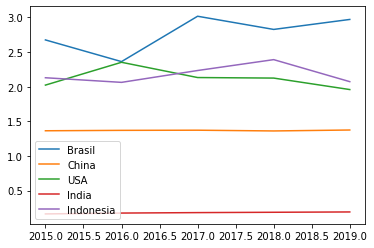

In [42]:
year=[2015,2016,2017,2018,2019]
plt.plot(year,favi['Brazil'],label='Brasil')
plt.plot(year,favi['China'],label='China')
plt.plot(year,favi['United States of America'],label='USA')
plt.plot(year,favi['India'], label='India')
plt.plot(year,favi['Indonesia'], label='Indonesia')
plt.legend()

In [43]:
remove=['Brazil','Suriname','Liberia','Gabon']
plot_list=list(set(favi.columns.tolist())-set(remove))

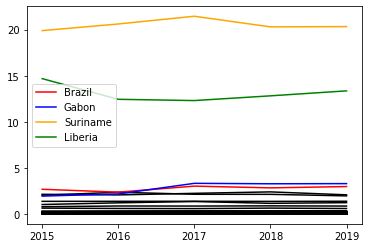

In [44]:
for i in plot_list:
    plt.plot(year,favi[i],'black')
plt.plot(year,favi['Brazil'],'r',label='Brazil')
plt.plot(year,favi['Gabon'],'b',label='Gabon')
plt.plot(year,favi['Suriname'],'orange',label='Suriname')
plt.plot(year,favi['Liberia'],'green',label='Liberia')
plt.xticks(year)
plt.legend()

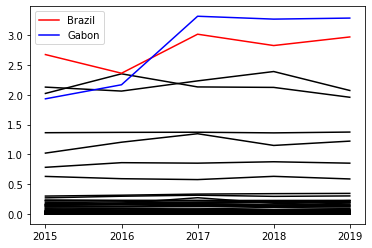

In [45]:
for i in plot_list:
    plt.plot(year,favi[i],'black')
plt.plot(year,favi['Brazil'],'r',label='Brazil')
plt.plot(year,favi['Gabon'],'b',label='Gabon')
plt.xticks(year)
plt.legend()

In [46]:
remove2=['Solomon Islands','Vanuatu']
col_mean=list(set(favi.columns.tolist())-set(remove2))

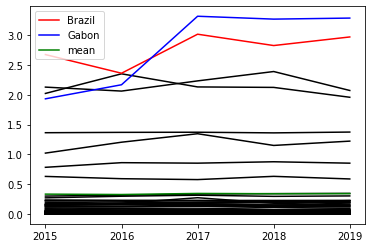

In [47]:
for i in plot_list:
    plt.plot(year,favi[i],'black')
plt.plot(year,favi['Brazil'],'r',label='Brazil')
plt.plot(year,favi['Gabon'],'b',label='Gabon')
plt.plot(year,favi[col_mean].mean(axis=1),'green',label='mean')
plt.xticks(year)
plt.legend()

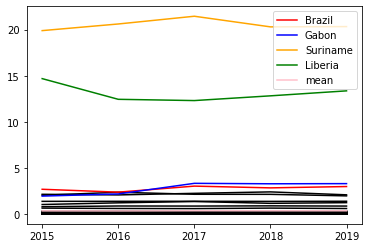

In [48]:
for i in plot_list:
    plt.plot(year,favi[i],'black')
plt.plot(year,favi['Brazil'],'r',label='Brazil')
plt.plot(year,favi['Gabon'],'b',label='Gabon')
plt.plot(year,favi['Suriname'],'orange',label='Suriname')
plt.plot(year,favi['Liberia'],'green',label='Liberia')
plt.plot(year,favi[col_mean].mean(axis=1),'pink',label='mean')
plt.xticks(year)
plt.legend()